In [77]:
import pandas as pd
#df = pd.read_csv(r'C:\Users\ckuli\handson-ml\datasets\yeast.csv')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=["Length","Width","Height","Explosive Force","Type"])#,delim_whitespace=False)

In [78]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [79]:
df.head()

,Length,Width,Height,Explosive Force,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.loc[1]

5.1                    4.7
3.5                    3.2
1.4                    1.3
0.2                    0.2
Iris-setosa    Iris-setosa
Name: 1, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [80]:
df.describe()

,Length,Width,Height,Explosive Force
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [81]:
def factor_scatter_matrix(df, factor, palette=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    if isinstance(factor, basestring):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('I messed with this.')

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)


    for rc in xrange(len(df.columns)):
        for group in classes:
            y = df[factor == group].icol(rc).values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])

    return axarr, color_map

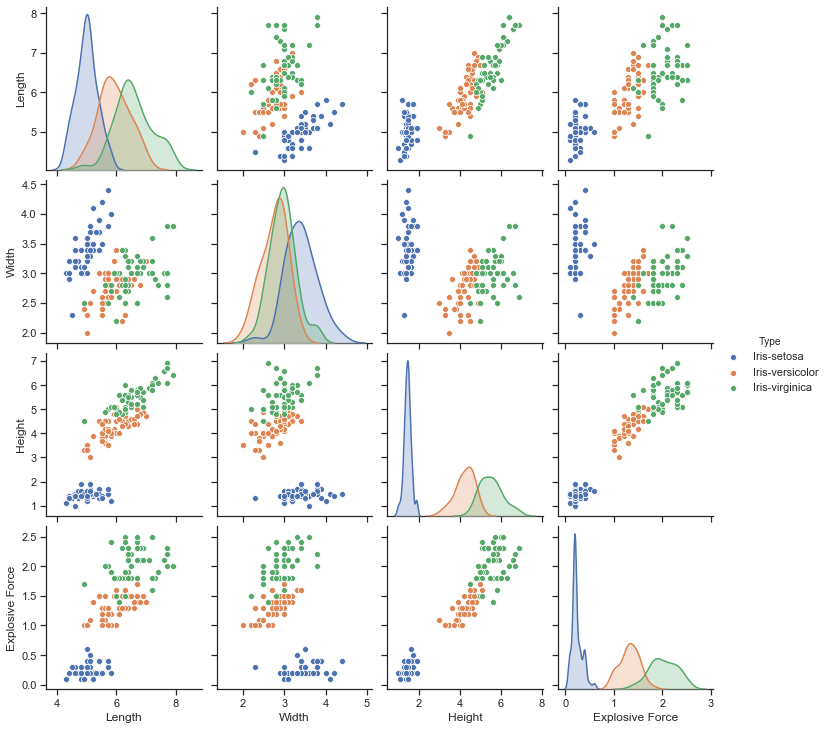

In [82]:
#from pandas.plotting import scatter_matrix

#colors = ['#e41a1c', '#377eb8', '#4eae4b', '#994fa1', '#ff8101', '#fdfc33', '#a8572c', '#f482be', '#999999']

#factor_scatter_matrix(df,'Iris-setosa')

#attributes = ["5.1", "3.5", "1.4", "0.2"]
#scatter_matrix(df[attributes], figsize=(12, 8))



import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df, hue="Type")

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2)

In [9]:
train_set.head()

,5.1,3.5,1.4,0.2,Iris-setosa
22,5.1,3.3,1.7,0.5,Iris-setosa
15,5.4,3.9,1.3,0.4,Iris-setosa
65,5.6,3.0,4.5,1.5,Iris-versicolor
11,4.8,3.0,1.4,0.1,Iris-setosa
42,5.0,3.5,1.6,0.6,Iris-setosa


In [10]:
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

In [11]:
train_set_x = train_set_copy.drop('Iris-setosa',axis = 1)
train_set_y = train_set_copy.drop(['5.1','3.5','1.4','0.2'],axis=1)
test_set_x = test_set_copy.drop('Iris-setosa',axis = 1)
test_set_y = test_set_copy.drop(['5.1','3.5','1.4','0.2'],axis=1)

In [12]:
train_set_x.head()

,5.1,3.5,1.4,0.2
22,5.1,3.3,1.7,0.5
15,5.4,3.9,1.3,0.4
65,5.6,3.0,4.5,1.5
11,4.8,3.0,1.4,0.1
42,5.0,3.5,1.6,0.6


In [13]:
train_set_y.head()

,Iris-setosa
22,Iris-setosa
15,Iris-setosa
65,Iris-versicolor
11,Iris-setosa
42,Iris-setosa


In [14]:
y_train_5 = (train_set_y == 'Iris-setosa')
y_test_5 = (test_set_y == 'Iris-setosa')

In [15]:
def conv_labels(x):
    
    out = []
    
    for q in x:
        if q == 'Iris-setosa':
            out.append(1)
        else:
            out.append(-1)
            
    return out

In [16]:
from sklearn.preprocessing import OrdinalEncoder

mod_train_y = train_set_y.apply(conv_labels)

In [17]:
mod_train_y.head()

,Iris-setosa
22,1
15,1
65,-1
11,1
42,1


In [18]:
for index, row in mod_train_y.iterrows():
    print(row['Iris-setosa'])

1
1
-1
1
1
-1
-1
1
1
1
-1
-1
-1
1
1
-1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
1
1
1
-1
-1
1
1
1
-1
1
-1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
-1
1
-1
-1
-1
1
-1
-1
1
-1
1
1
-1
-1
-1
-1
-1
-1
1
1
-1
-1
1
1
1
-1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
1
-1
-1
1
-1
-1
-1
1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
1
-1
-1


In [62]:
#Perceptron!

class Perceptron:
    
    theta = np.array([0.1,0.1,0.1,0.1])
    
    def _init_(self,theta=np.array([0.1,0.1,0.1,0.1])):
        self.theta = theta
    
    def learn(self, data, labels):
        
        k = 0
            
        iters = 100
        
        for q in range(iters):
            
            k = k + 1
            i = k % len(data)
            
            thetaTrans = self.theta.transpose()

            score = np.dot(self.theta,data[i:i+1].transpose())

            pred = -1
            if score[0] > 0:
                pred = 1
            
            if not (pred == np.array(labels[i:i+1])[0]):
                self.theta = np.array(np.add(self.theta.transpose(), (-1*pred) * data[i:i+1]))[0]
       
                
    def predict(self, data):
        score = np.dot(self.theta,data.transpose())
        return score

In [63]:
percep = Perceptron()

percep.learn(train_set_x, mod_train_y)

print(str(percep.predict(train_set_x[0:1])))
print(str(percep.predict(train_set_x[1:2])))
print(str(percep.predict(train_set_x[2:3])))

print(str(percep.predict(test_set_x[0:1])))
print(str(percep.predict(test_set_x[1:2])))
print(str(percep.predict(test_set_x[2:3])))

[14.17]
[23.12]
[-20.18]
[-15.09]
[20.]
[-44.78]


In [61]:
train_set_x[0:1]
test_set_y[0:3]

,Iris-setosa
73,Iris-versicolor
18,Iris-setosa
117,Iris-virginica


In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty)
sgd_clf.fit(train_set_x, y_train_5)

C:\Users\ckuli\Miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=-inf,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_set_x, y_train_5, cv=5, scoring="accuracy")

C:\Users\ckuli\Miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuli\Miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuli\Miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuli\Miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

array([1.        , 1.        , 0.95833333, 1.        , 1.        ])

In [53]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, train_set_x, y_train_5, cv=3)

C:\Users\ckuli\Miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuli\Miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuli\Miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[80,  0],
       [ 0, 39]], dtype=int64)